---
title: 多层线性模型教程及R应用
date: 2023-02-16 10:17:23
tags: [多层线性模型]
mathjax: true
---

多层线性模型(Hierarchical Linear Model, HLM) 是一种线性回归模型，
其中包括一组低层回归模型，以及一个高层回归模型。
低层模型预测每个观察单位的响应变量，而高层模型对低层模型的回归系数进行建模，
从而对其他观察单位的回归系数进行预测。 
HLM可以用于探究不同单位间的关系，并且可以处理嵌套数据（例如，学生在不同班级的数据）的情况。

<!-- more -->

## 术语 multilevel, hierarchical, and mixed models

multilevel和hierarchical都是多层的意思， 实际上我没有发现它两个之间的区别。
而混合效应模型（mixed effect models）MEM是一种随机效应模型，它与固定效应模型不同，
因为它考虑了观察单位之间的随机变化。在MEM中，因变量的响应与固定效应和随机效应相关。
固定效应可以解释观察单位固定的差异，而随机效应可以解释观察单位间的随机变化。
MEM通常用于分析观察单位之间具有随机变化的数据。

说了这么多， 你可能不理解， 我们引用书《[lme4: Mixed-effects modeling with R](https://stat.ethz.ch/~maechler/MEMo-pages/lMMwR.pdf)》中的一句话来说明：

    Some presentations of mixed-effects models, especially those related to multilevel modeling˜[Rasbash et˜al., 2000] or hierarchical linear models˜[Raudenbush and Bryk, 2002], leave the impression that one can only define random effects with respect to factors that are nested. This is the origin of the terms “multilevel”, referring to multiple, nested levels of variability, and “hierarchical”, also invoking the concept of a hierarchy of levels. To be fair, both those references do describe the use of models with random effects associated with non-nested factors, but such models tend to be treated as a special case.

上面这些话的意思是， 多层模型实际上是混合效应模型的应用， 
是混合效应模型在嵌套数据上的应用，
多层模型是混合效应模型的子集，
混合效应模型不仅仅可以用在嵌套数据中。





## 多层次线性模型软件推荐

以下是可以用来做多层线性模型的常用软件：

- R：R 是一个强大的开源统计计算和图形软件环境。它有几个用于多层建模的包，包括 lme4、nlme 和 lmerTest。
- SAS：SAS 是一个商业化的高级分析、数据管理和商业智能软件套件。它有多层建模的程序，如 PROC MIXED 和 PROC GLIMMIX。
- SPSS：SPSS 是一个商业化的统计分析软件包。它有一个混合效应建模模块，叫做通用线性混合模型（GLMM）。
- Stata：Stata 是一个数据管理和统计分析软件套件。它有一组用于多层建模的命令，包括 xtmixed 和 xtmelogit。
- HLM：HLM 是一个专门用于多层建模的软件包。它专门用于层次线性模型，具有用户友好的界面和用于模型估计和可视化的高级功能。实际用户体验比较差，不是免费软件。

一般来说，软件的选择取决于分析的具体要求，包括模型的复杂程度、数据的大小以及个人偏好。

## R中一般用哪些包做多层线性模型

R 中有几个常用的包可以用于做多层线性模型，它们包括：

- lme4：这是一个常用的 R 包，用于处理多层数据。它提供了一种灵活的框架，允许建模不同数量的随机效应，并且支持多种模型实现，包括线性和非线性模型。
- nlme：这是一个 R 包，专门用于处理多层数据。它的功能与 lme4 类似，但它更强大，并且可以建模不同类型的模型，例如非线性和非正态模型。
- lmerTest：这是一个 R 包，用于提供统计学的检验以评估 lme4 模型的结果。
- multilevel：这是一个 R 包，专门用于多层建模。它提供了一种灵活的框架，允许建模不同数量的随机效应，并提供了许多可视化工具，以便对模型的结果进行诊断。

我们的教程首先使用lme4这个包， 它比较简单， 而且它模型的定义脚本使用的是和"lm"一样的语法， "lm"这个函数已经在之前的教程中多次使用，
所以比较习惯了。比如定义一个回归模型：

```r
lm(formula = DependentVariable ~ IndependentVariable, data = dataframe)
```
lme4 包中的 lmer 方法添加了 group/subject 变量 及其 将要估计的随机效应， 
比如“|”竖线符号代表嵌套或者分组变量， 1 代表随机截距。

我们看一个模型：

```r
lmer(data = dataframe, DependentVariable ~ IndependentVariable + (1 | GroupVariable))
```

你知道这个模型的意义吗？ 不用着急我们下面会定义多种模型，并在视频教程中详细解释。

（例子中， Subject 代表分组变量， 比如员工嵌套在公司当中， 公司就是Subject； 角标s表示随Subject变化的随机变量）

- 一般的线性模型：$Y_{si} = β_0 + β_{1}X_{i} + e_{si}$  -> `N/A (Not a mixed-effects model)`
- 随机截距模型： $Y_{si} = β_0 + S_{0s} + β_{1}X_{i} + e_{si}$  -> `Y ∼ X+(1∣ Subject)`
- 随机截距和随机斜率模型： $Y_{si} = β_0 + S_{0s} +  (β_{1} + S_{1s})X_i + e_{si}$ -> `Y ∼ X+(1 + X∣Subject)`
- 仅有随机斜率模型： $Y_{si} = β_0 +  (β_{1} + S_{1s})X_i + e_{si}$ -> `Y ∼ X+(0 + X∣Subject)`
- 有两个分组变量： $Y_{si} = β_0 + S_{0s} + I_{0i} +  (β_{1} + S_{1s})X_i + e_{si}$ -> `Y ∼ X+(1 + X∣Subject)+(1∣Item)`
- 和上面一样但是$S_{0s}$和$S_{1s}独立$： $Y_{si} = β_0 + S_{0s} + I_{0i} +  (β_{1} + S_{1s})X_i + e_{si}$ -> `Y ∼ X+(1∣Subject)+(0 + X∣ Subject)+(1∣Item)`
- 有两个随机截距： $Y_{si} = β_0 + S_{0s} + I_{0i} + β_{1}X_{i} + e_{si}$ -> `Y ∼ X+(1∣Subject)+(1∣Item)`
- 截距和斜率来自两个随机效应： $Y_{si} = β_0 + I_{0i} +  (β_{1} + S_{1s})X_i + e_{si}$ -> `Y ∼ X+(0 + X∣Subject)+(1∣Item)`






## 案例介绍

人都是通过案例学习的， 我们先介绍我们的案例， 这些是来自 20 家公司的虚构工资数据，每家公司有 30 名员工。
对于每个员工，都可以获得有关他/她的薪水（salary）、该人受雇于哪家公司（firma）以及该人在那里工作了多长时间（experience）的信息。
我们还有关于公司活跃的部门（公共或私人）的信息（sector）。

加载数据， 我们大概浏览一下数据, 你可以从[这里](https://raw.githubusercontent.com/methodenlehre/data/master/salary-data.csv)下载数据：

In [2]:
library(tidyverse)
df <- read_csv("salary-data.csv")

head(df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 600 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): firma, sector
dbl (2): experience, salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


firma,experience,salary,sector
<chr>,<dbl>,<dbl>,<chr>
Firma 01,6.87,8957.207,Privat
Firma 01,5.66,9544.653,Privat
Firma 01,4.58,7303.676,Privat
Firma 01,6.56,8088.600,Privat
Firma 01,8.83,14302.672,Privat
Firma 01,7.73,10259.126,Privat


firma和sector是两个分类变量， 他们需要定义为“factor":

In [3]:
df <- df %>%
  mutate(firma = as.factor(firma),
         sector = as.factor(sector))

tail(df)

firma,experience,salary,sector
<fct>,<dbl>,<dbl>,<fct>
Firma 20,3.58,6838.196,Privat
Firma 20,3.18,7603.972,Privat
Firma 20,3.39,5713.793,Privat
Firma 20,7.12,10089.086,Privat
Firma 20,2.98,6939.708,Privat
Firma 20,6.45,9330.324,Privat


In [4]:
summary(df)

      firma       experience         salary              sector   
 Firma 01: 30   Min.   : 0.000   Min.   : 4587   Oeffentlich:300  
 Firma 02: 30   1st Qu.: 4.027   1st Qu.: 7602   Privat     :300  
 Firma 03: 30   Median : 5.170   Median : 8564                    
 Firma 04: 30   Mean   : 5.190   Mean   : 8738                    
 Firma 05: 30   3rd Qu.: 6.402   3rd Qu.: 9840                    
 Firma 06: 30   Max.   :10.000   Max.   :15418                    
 (Other) :420                                                     

## 简单截距模型 Intercept-only model

- Level-1 model: 
    - $\boldsymbol {y_{mi}=\beta_{0i}+\epsilon_{mi}}$
- Level-2 model: 
    - $\boldsymbol {\beta_{0i}=\gamma_{00} + \upsilon_{0i}}$
- Overall model:
    - $\boldsymbol {y_{mi} = \gamma_{00} + \upsilon_{0i}+\epsilon_{mi}} $


在该模型中没有引入任何自变量， 只有截距项随不同组变化， 也就是允许不同的公司的平均工资有不同。



In [5]:
library(lme4)
intercept.only.model <- lmer(salary ~ 1 + (1 | firma), data = df, REML = TRUE)

# 用每个公司的平均工资来预测个体的工资salary
# 我们将预测的结果保存到数据框中， 变量名是intercept.only.preds
df$intercept.only.preds <- predict(intercept.only.model)

# Model output
summary(intercept.only.model)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




Linear mixed model fit by REML ['lmerMod']
Formula: salary ~ 1 + (1 | firma)
   Data: df

REML criterion at convergence: 10433.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9816 -0.6506 -0.0494  0.5779  4.2131 

Random effects:
 Groups   Name        Variance Std.Dev.
 firma    (Intercept)  851249   922.6  
 Residual             1954745  1398.1  
Number of obs: 600, groups:  firma, 20

Fixed effects:
            Estimate Std. Error t value
(Intercept)   8737.6      214.1   40.82

我们可以使用"ranef()"方法来获得模型中的第二层残差，也就是$\upsilon_{0i}$ :

In [6]:
ranef(intercept.only.model)

$firma
         (Intercept)
Firma 01   789.65416
Firma 02  1105.01807
Firma 03  1923.02618
Firma 04 -1136.50080
Firma 05   953.54595
Firma 06  -958.93186
Firma 07   -10.14627
Firma 08  -254.84048
Firma 09  -651.31802
Firma 10   768.48590
Firma 11  -506.26620
Firma 12   940.40709
Firma 13  -742.84383
Firma 14  -975.45482
Firma 15 -1161.36931
Firma 16   -97.68008
Firma 17   661.96052
Firma 18  -168.11195
Firma 19   351.23926
Firma 20  -829.87351

with conditional variances for "firma" 

### ICC（Intraclass correlation）

ICC（Intraclass correlation）量化了因第二层系统性差异对依赖变量的“不独立性”的程度。
第二层方差（组均值的方差）相对于总方差（第二层方差和第一层或残差方差的总和）的比例越大，
第二层单位内的相似性与第二层单位间的相似性之间的差异就越大。

ICC的计算公式是：

$$
\boldsymbol {\rho = \frac{\sigma^2_{Level-2}}{\sigma^2_{Level-2}+ \sigma^2_{Level-1}}}
$$

ICC通过估计一个空模型（仅截距模型，详见上面）获得，在该模型中，截距（随机）方差（在没有预测变量的模型中，这对应于组均值的方差）和第一层残差方差都被输出。
所以， 从上面summary中输出的结果可以计算ICC：

$$
\hat{\rho} = \frac{\hat{\sigma}^2_{\upsilon_0}}{\hat{\sigma}^2_{\upsilon_0}+ \hat{\sigma}^2_\epsilon} = \frac {851249}{851249+1954745} {= 0.3034}
$$

Cohen (1988) 认为ICC在0.059以内组内相关过低， 超过0.139是高度组内相关， 两者之间就是中等成都的组内相关。
我们的结果显示，ICC为高度组内相关， 所以适合做多水平模型。参考文献可以在文末的视频教程下载链接里。

### 截距方差的显著性检验

现在，我们已经知道了因变量薪水的第二层方差，但我们尚未对该参数进行显著性检验。可以通过将截距模型与不包含随机截距的模型进行比较来获得显著性检验，
用没有预测变量的“正常”线性模型（只有总均值γ和第一层残差方差σ2作为模型参数）。这个模型也可以称为“绝对空模型”。我们不需要指定这样的模型，但可以将ranova（）应用于输出对象intercept.only.model。ranova（）（来自lme4辅助包lmerTest）自动执行模型比较（仅）对于随机效应，逐步删除现有随机效应，然后将输出模型与因此减少的模型进行比较。
在这种情况下，只能删除一个随机效应，即截距的随机效应。

In [7]:
#install.packages("lmerTest")
library(lmerTest)
ranova(intercept.only.model)


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,3,-5216.745,10439.49,NA,NA,NA
(1 | firma),2,-5295.468,10594.94,157.4452,1,4.091411e-36


从上面的结果中可以看出来， 模型的拟合度有显著差异$(p<0.001)$， 这意味着， 我们使用随机截距是合理的，
上面是双侧检验的结果， 实际上截距模型肯定比空模型的残差方差小， 所以这可以是个单侧检验， 将P值除以二就行。

In [8]:
head(df)

firma,experience,salary,sector,intercept.only.preds
<fct>,<dbl>,<dbl>,<fct>,<dbl>
Firma 01,6.87,8957.207,Privat,9527.256
Firma 01,5.66,9544.653,Privat,9527.256
Firma 01,4.58,7303.676,Privat,9527.256
Firma 01,6.56,8088.600,Privat,9527.256
Firma 01,8.83,14302.672,Privat,9527.256
Firma 01,7.73,10259.126,Privat,9527.256


### 可视化

将截距模型和空模型可视化， 先看下空模型，由于截距是固定的， 所以只有一条拟合线， 就是经过工资均值的那条线：





Warning message:
"Use of `df$salary` is discouraged.
ℹ Use `salary` instead."


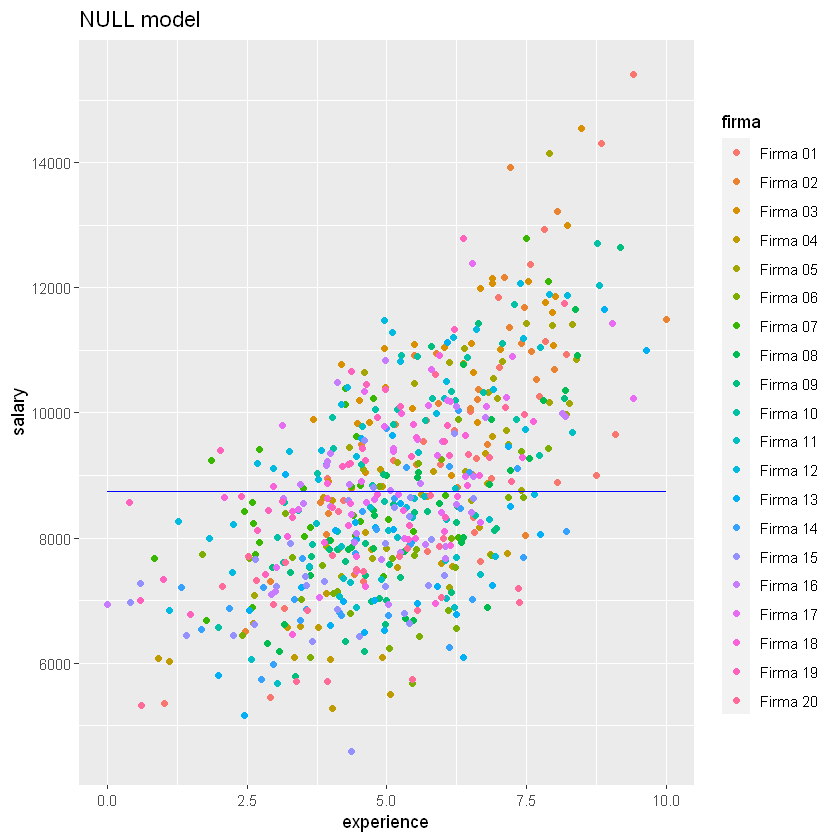

In [9]:
# 空模型
library(ggplot2)
ggplot(data = df, aes(x = experience, y = salary, color=firma, )) + 
    ggtitle("NULL model") +
    geom_point() +
    geom_line(data=df, aes(x=experience, y=mean(df$salary)), color='blue')

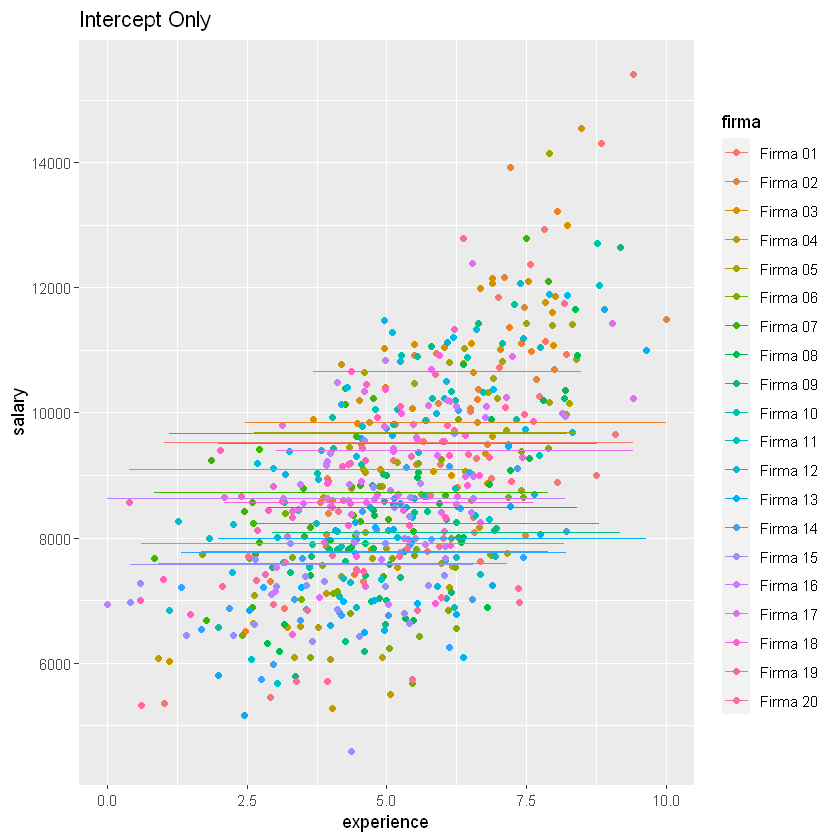

In [10]:
# 简单截距模型
ggplot(data = df, aes(x = experience, y = salary, color=firma)) + 
    ggtitle("Intercept Only") +
    geom_point() +
    geom_line(data=df, aes(x=experience, y=intercept.only.preds, group=firma))

## 随机截距模型 Random intercept model

Level 1 model: 
- $\boldsymbol {y_{mi}=\beta_{0i} + \beta_{1i} \cdot x_{mi} + \epsilon_{mi}}$

Level 2 model:

- $\boldsymbol {\beta_{0i}=\gamma_{00} + \upsilon_{0i}}$

- $\boldsymbol {\beta_{1i}=\gamma_{10}} $




Overall model: 
- $\boldsymbol {y_{mi}=\gamma_{00} + \gamma_{10} \cdot x_{mi} + \upsilon_{0i}+\epsilon_{mi}}$

### 模型估计



In [11]:
random.intercept.model <-  lmer(salary ~ experience + (1 | firma), 
                                data = df, REML = TRUE)

df$random.intercept.preds <-  predict(random.intercept.model)

summary(random.intercept.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: salary ~ experience + (1 | firma)
   Data: df

REML criterion at convergence: 10127.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8109 -0.6884  0.0005  0.5980  3.8833 

Random effects:
 Groups   Name        Variance Std.Dev.
 firma    (Intercept)  614367   783.8  
 Residual             1184502  1088.3  
Number of obs: 600, groups:  firma, 20

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  5964.18     229.41   48.00   26.00   <2e-16 ***
experience    534.34      27.21  589.48   19.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr)
experience -0.615

结果显示， experience的固定效应是显著的$(\hat\gamma_{10} = 534.34, p < 0.001)$， 意味着经验可以显著正向预测工资收入。
对于所有人， 工作经验每增加一年， 工资增加534。

使用"ranef()"方法可以获得公司的的随机效应$\upsilon_{0i}$， 它代表不同公司的截距。

In [12]:
ranef(random.intercept.model)

$firma
         (Intercept)
Firma 01   204.30372
Firma 02   646.14732
Firma 03  1492.00151
Firma 04  -910.78990
Firma 05   389.16512
Firma 06  -924.63977
Firma 07   577.66959
Firma 08  -516.51767
Firma 09  -638.24646
Firma 10   768.48113
Firma 11  -619.55111
Firma 12  1091.33530
Firma 13  -773.67207
Firma 14  -738.17926
Firma 15  -652.94087
Firma 16    57.33923
Firma 17   458.05487
Firma 18   -89.38416
Firma 19   944.22822
Firma 20  -764.80474

with conditional variances for "firma" 

与之前的截距模型相比，这些值似乎的降低了， 这代表模型解释力更高了。
下一部分，我们将要计算experience对因变量的方差解释率， 就能更清楚的说明问题。

### experience的方差解释率

我们使用$R^2$代表方差解释率，那么在模型的第一层，experience的方差解释率是：

$$
R^2_{Level-1} = \frac {\sigma^2_{\epsilon_1} - \sigma^2_{\epsilon_2}}{\sigma^2_{\epsilon_1}} = \frac {{1954745}-{1184502}}{1954745} = {0.394}
$$

注意1954745是前面的截距模型（Intercept-Only)的残差方差。

那么experience对方差的解释率为：

$$
R^2_{Gesamt} = \frac {(\sigma^2_{\upsilon_01} + \sigma^2_{\epsilon_1}) - (\sigma^2_{\upsilon_02} + \sigma^2_{\epsilon_2})}{\sigma^2_{\upsilon_01} + \sigma^2_{\epsilon_1}} = \frac{({851249 + 1954745}) - ({614367 + 1184502}) } { 851249 + 1954745} = 0.3589
$$

$(\sigma^2_{\upsilon_01} + \sigma^2_{\epsilon_1})$是简单截距模型（Intercept-Only)两层残差方差。

你可以看到啊， 由于experience的加入， 不仅仅第一层的残差减少， 第二层的残差方差也减少。

你可以通过下面的可视化模型来理解这个问题， 由于experience的加入，虽然我们固定了experience的系数在各个公司中相同，
意味着下面每条回归线都是平行的（斜率相同）， 但是增加experience之后， 回归线发生了倾斜，斜率不再是0， 所以截距也更合理了， 截距的误差降低。

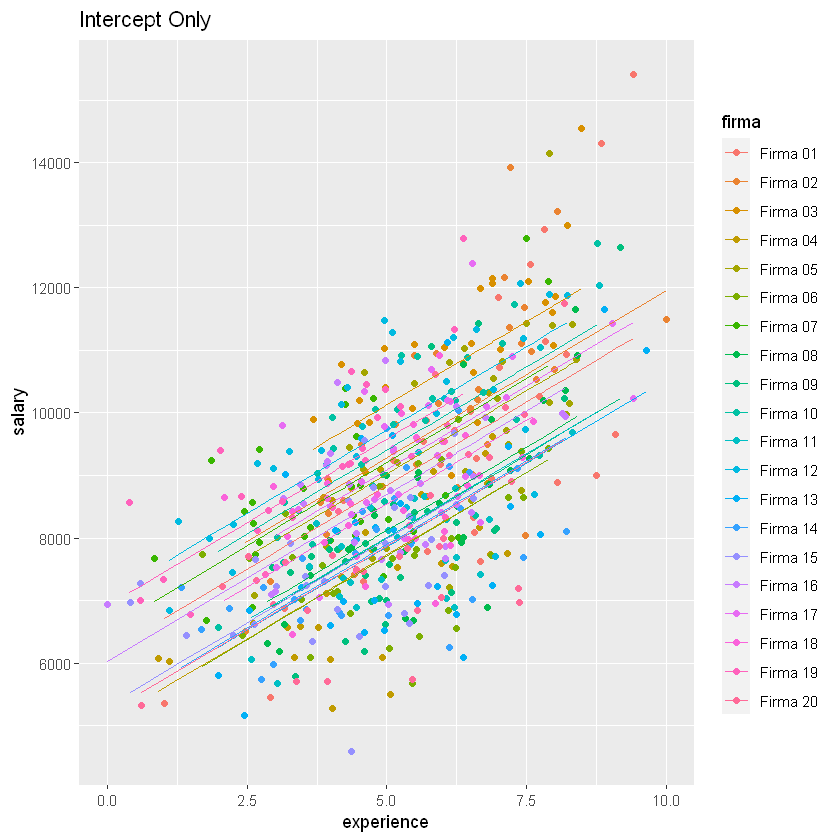

In [13]:
# 简单截距模型
ggplot(data = df, aes(x = experience, y = salary, color=firma)) + 
    ggtitle("Intercept Only") +
    geom_point() +
    geom_line(data=df, aes(x=experience, y=random.intercept.preds, group=firma))

## 随机斜率模型 Random coefficients modell

这个模型包括随机截距和随机斜率， 我们先看下模型：

- Level 1 Model： 
    - $\boldsymbol {y_{mi}=\beta_{0i} + \beta_{1i} \cdot x_{mi} + \epsilon_{mi}}$
- Level 2 model: 
    - $\boldsymbol {\beta_{0i}=\gamma_{00} + \upsilon_{0i}}$
    - $\boldsymbol {\beta_{1i}=\gamma_{10} + \upsilon_{1i}}$
- Overall model:
    - $\boldsymbol {y_{mi}=\gamma_{00} + \gamma_{10} \cdot x_{mi} + \upsilon_{0i} + \upsilon_{1i} \cdot x_{mi} + \epsilon_{mi}}$

### 估计模型

In [14]:
random.coefficients.model <-  lmer(salary ~ experience + (experience | firma),
                                   data = df, REML = TRUE)

df$random.coefficients.preds <-  predict(random.coefficients.model)

summary(random.coefficients.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: salary ~ experience + (experience | firma)
   Data: df

REML criterion at convergence: 10117.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8308 -0.6804  0.0037  0.5999  3.3607 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 firma    (Intercept)  722929   850.3        
          experience    18398   135.6   -0.51
 Residual             1136284  1066.0        
Number of obs: 600, groups:  firma, 20

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  5933.70     240.41   18.88   24.68 7.86e-16 ***
experience    530.85      40.59   18.94   13.08 6.23e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr)
experience -0.690

同样， 经验的固定效应是显著的$(\hat\gamma_{10} = 530.85, p < 0.001)$， 
然而这个模型的关注重点是是随机斜率的方差$\hat\sigma^2_{\upsilon_1} = 18398$,
即$\hat\sigma_{\upsilon_1} = \sqrt{18398} = 135.6$， 这个值如果显著大于0，
说明随机斜率是有意义的， 它允许斜率在不同组间变化， 使得模型对数据的解释率提高。

但是怎样检验$\hat\sigma^2_{\upsilon_1}$的显著性呢？我们最好的方法是使用`ranova`方法进行LR test， 
在此之前， 我们先要知道， 该模型与之前的模型(随机截距模型)相比，还有一个参数是截距与斜率的残差的相关： $\hat\sigma_{\upsilon_0\upsilon_1}$,
看结果里， 估计的参数值是$r_{\upsilon_0\upsilon_1} = -0.51$。
这怎么理解呢， 就是当员工经验为0（刚入门）的时候， 员工工资越高工资增长率越低。

### 检验$\sigma^2_{\upsilon_1}$的显著性：与随机截距模型相比

这两个模型有两个参数的区别， 所以比较模型的时候其实是同时考虑两个参数的， 不仅仅是$\sigma^2_{\upsilon_1}$。




In [15]:
ranova(random.coefficients.model)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,6,-5058.539,10129.08,NA,NA,NA
experience in (experience | firma),4,-5063.544,10135.09,10.01154,2,0.006699176


另一个可选方法是使用`anova`：

In [16]:
anova(random.coefficients.model, random.intercept.model, refit = FALSE) #refit是否重新计算模型

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
random.intercept.model,4,10135.09,10152.68,-5063.544,10127.09,NA,NA,NA
random.coefficients.model,6,10129.08,10155.46,-5058.539,10117.08,10.01154,2,0.006699176


结果显示 LR test 是显著的， 意味着两个参数不为零。但是p值计算结果是有问题的，
因为这个双侧检验， 但是我们的其中一个参数是不能小于0的， 所以应该进行单侧检验，
正确的方法是重新计算p值， 考虑到 LR test 是联合卡方分布， 两个分布自由度分别是1和2。

In [17]:
# 正确的p值是0.004, 略低于双侧检验的结果
0.5 * pchisq(10.011, 1, lower.tail = FALSE) + 
  0.5 * pchisq(10.011, 2, lower.tail = FALSE)

[1] 0.004128535

### 可视化


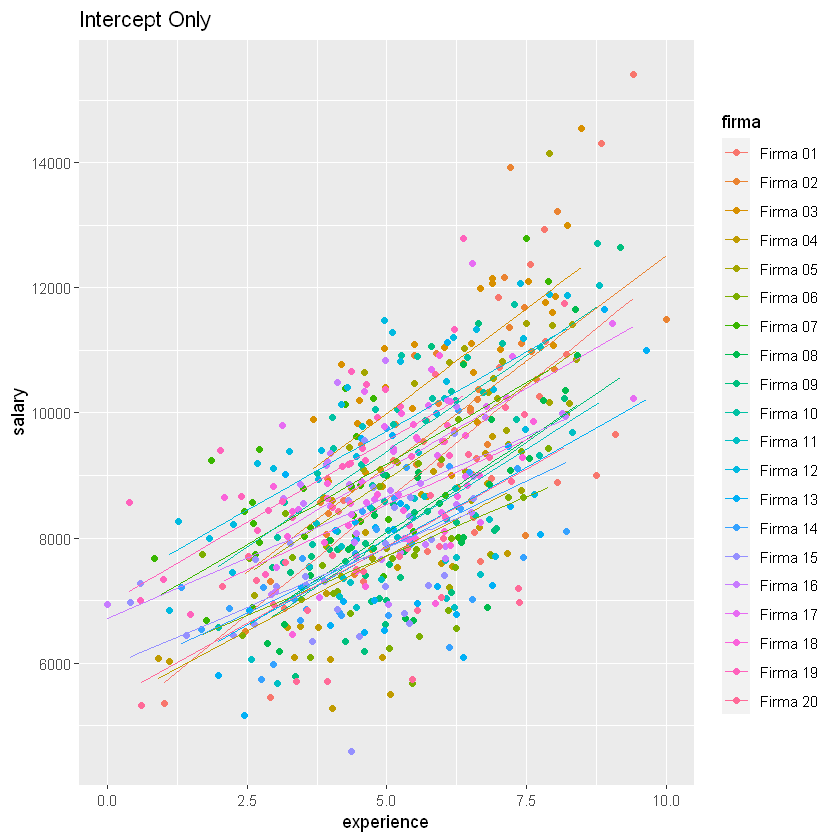

In [18]:
ggplot(data = df, aes(x = experience, y = salary, color=firma)) + 
    ggtitle("Intercept Only") +
    geom_point() +
    geom_line(data=df, aes(x=experience, y=random.coefficients.preds, group=firma))

## 第二层包含自变量的模型 Models including level 2 predictors



### 截距预测模型  Intercept-as-outcome model

在这个模型中你需要区分“experience_gm”和“experience_gc”， 在之前的模型中我们使用了“experience”， 而“experience_gm”就是经过组平均的变量， 比如组变量是团队， “experience_gm”就是求每个团队的平均“experience”， 而“experience_gc”不同， 是“experience-experience_gc”， 就是每个人的经验减去组均值， 这叫做组中心化后的变量。

在这种模型中，第二层自变量是分组聚合的“experience_gm”， 第一层自变量是组中心化的“experience_gc”， 这两个变量都要事先准备好。

我们直接用公式来表示比较清晰：

- Level 1 model:
    - $\boldsymbol {y_{mi}=\beta_{0i} + \beta_{1i} \cdot (x_{mi} - \mu_{\cdot i(X)}) + \epsilon_{mi}}$ **注：$(x_{mi} - \mu_{\cdot i(X)})$就是进行了组中心化**
- Level 2 model:
    - $\boldsymbol {\beta_{0i}=\gamma_{00} + \gamma_{01} \cdot \mu_{\cdot i(X)} + \upsilon_{0i}}$
    - $\boldsymbol {\beta_{1i}=\gamma_{10}}$
- Overall model:
    - $\boldsymbol {y_{mi}=\gamma_{00} + \gamma_{10} \cdot (x_{mi} - \mu_{\cdot i(X)}) + \gamma_{01} \cdot \mu_{\cdot i(X)} + \upsilon_{0i} + \epsilon_{mi}}$

#### 如何计算组均值

第二层的变量“experience_gm”是组均值， 那么如何R中计算组均值变量， 我们演示一下：



In [19]:

df <- df %>% 
  group_by(firma) %>% # group_by和mutate 是 tidyverse的函数
  mutate(experience_gm = mean(experience),
         experience_gc = experience - experience_gm) %>%
  ungroup() %>%
  dplyr::select(firma, sector, experience, experience_gm, experience_gc, salary)
# select() 只是改变了变量顺序

# 查看数据
head(df)

firma,sector,experience,experience_gm,experience_gc,salary
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Firma 01,Privat,6.87,6.374333,0.4956667,8957.207
Firma 01,Privat,5.66,6.374333,-0.7143333,9544.653
Firma 01,Privat,4.58,6.374333,-1.7943333,7303.676
Firma 01,Privat,6.56,6.374333,0.1856667,8088.600
Firma 01,Privat,8.83,6.374333,2.4556667,14302.672
Firma 01,Privat,7.73,6.374333,1.3556667,10259.126


#### 估计模型

模型需要的变量准备好了， 接下来就是估计模型了：

In [20]:
context.model <- lmer(salary ~ experience_gc + experience_gm + (1 | firma),
                      data = df, REML = TRUE)

df$context.model.preds <- predict(context.model)

summary(context.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: salary ~ experience_gc + experience_gm + (1 | firma)
   Data: df

REML criterion at convergence: 10113.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7991 -0.6796  0.0043  0.6008  3.8752 

Random effects:
 Groups   Name        Variance Std.Dev.
 firma    (Intercept)  622987   789.3  
 Residual             1184508  1088.4  
Number of obs: 600, groups:  firma, 20

Fixed effects:
              Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    4779.25    1387.36   18.00   3.445  0.00289 ** 
experience_gc   531.88      27.35  579.00  19.446  < 2e-16 ***
experience_gm   762.64     264.99   18.00   2.878  0.01001 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) exprnc_gc
experinc_gc  0.000          
experinc_gm -0.991  0.000   

“experience_gc”的固定效应是531.88， 并且是显著的，
说明在公司内部，与平均经验相比，每增加1个单位经验， 工资增加531.88；
“experience_gm”的固定效应是762.64， 并且是显著的，
说明一个员工工资有一部分由公司平均经验决定， 平均经验每增加一个单位工资增加762.64。



### 截距预测模型2 General intercept-as-outcome model

这个模型包含一个level2的自变量， 用于预测随机截距，
可以包含也可以不包含随机斜率。在这个模型中，
我们考虑我们的案例， sector（私企还是国企）可能会影响员工的工资。

这个模型可以没有随机斜率， 但是为了更普遍起见， 我们纳入了随机的斜率， 模型如下：

- Level 1 model:
    - $\boldsymbol {y_{mi}=\beta_{0i} + \beta_{1i} \cdot x_{mi} + \epsilon_{mi}}$
- Level 2 model:
    - $\boldsymbol {\beta_{0i}=\gamma_{00} + \gamma_{01} \cdot z_i + \upsilon_{0i}}$
    - $\boldsymbol {\beta_{1i}=\gamma_{10} + \upsilon_{1i}}$
- Overall model:
    - $\boldsymbol {y_{mi}=\gamma_{00} + \gamma_{10} \cdot x_{mi} + \gamma_{01} \cdot z_i + \upsilon_{0i} \cdot x_{mi} + \epsilon_{mi}}$

#### 估计模型

与“experience_gm ”不同的是， “sector”是一个分类变量，它在R中是一个factor类型的变量，
R中的“lme4”这个包会自动帮我们把factor转换为哑变量， 所以不需要我们特殊处理，
当前情况下， sector只有两个分类， 它本身可以被当作一个哑变量。



In [21]:
intercept.as.outcome.model <- lmer(salary ~ experience + sector +
                                     (experience | firma), 
                                   data = df, REML = TRUE)

df$intercept.as.outcome.preds <- predict(intercept.as.outcome.model)

summary(intercept.as.outcome.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: salary ~ experience + sector + (experience | firma)
   Data: df

REML criterion at convergence: 10102.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8397 -0.6713  0.0018  0.6041  3.3846 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 firma    (Intercept)  487110   697.9        
          experience    18614   136.4   -0.31
 Residual             1136311  1066.0        
Number of obs: 600, groups:  firma, 20

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   6187.38     263.80   15.64  23.455 1.30e-13 ***
experience     532.42      40.77   19.06  13.060 5.86e-11 ***
sectorPrivat  -529.51     343.42   18.15  -1.542     0.14    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) exprnc
experience  -0.450       
sectorPrivt -0.585 -0.062

sectorPrivat  这个变量就是哑变量， 它的意思是当sector为Privat时，变量值为1， 否则值为0， 这时候我们是以Public为参照分类的；
它的固定效应是-529.51， 意味着私企（Privat）平均工资比国企（Public）平均工资低-529.51， 但是这个效应并不显著（p=0.14）。
$\hat\gamma_{00} = 6187.38$的含义也变了， 它代表国企员工，工作经验为0的时候的平均工资。

### 斜率预测模型 Slope-as-outcome model

在这个模型中，我们想问一个问题，experience的对工资的效应是否受到企业性质（私企还是国企）的影响，
这是一个调节效应， 斜率预测模型就是用调节变量预测自变量的斜率。我们看下模型：

- Level 1 model:
    - $\boldsymbol {y_{mi}=\beta_{0i} + \beta_{1i} \cdot x_{mi} + \epsilon_{mi}}$
- Level 2 model:
    - $\boldsymbol {\beta_{0i}=\gamma_{00} + \gamma_{01} \cdot z_i + \upsilon_{0i}}$
    - $\boldsymbol {\beta_{1i}=\gamma_{10} + \gamma_{11} \cdot z_i + \upsilon_{1i}}$
- Overall model:
    - $\boldsymbol {y_{mi}=\gamma_{00} + \gamma_{10} \cdot x_{mi} + \gamma_{01} \cdot z_i + \gamma_{11} \cdot x_{mi} \cdot z_i + \upsilon_{0i} + \upsilon_{1i} \cdot x_{mi} + \epsilon_{mi}}$

#### 模型估计

注意在写公式的时候使用了星号， `experience*sector`代表公式中的$\gamma_{10} \cdot x_{mi} + \gamma_{01} \cdot z_i + \gamma_{11} \cdot x_{mi} \cdot z_i$

In [22]:
slope.as.outcome.model <- lmer(salary ~ experience*sector +
                         (experience | firma), 
                         data = df, REML = TRUE)

summary(slope.as.outcome.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: salary ~ experience * sector + (experience | firma)
   Data: df

REML criterion at convergence: 10083.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8271 -0.6923 -0.0319  0.6088  3.4093 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 firma    (Intercept)  341720   584.57      
          experience     7713    87.82  0.13
 Residual             1137612  1066.59      
Number of obs: 600, groups:  firma, 20

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              6494.10     261.10    13.40  24.872 1.31e-12 ***
experience                427.35      46.38    16.93   9.215 5.23e-08 ***
sectorPrivat            -1212.69     394.05    17.30  -3.078  0.00672 ** 
experience:sectorPrivat   216.95      66.66    18.05   3.255  0.00439 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlati

结果显示交互效应是显著的（$\hat\gamma_{11} =216.95,p= 0.0044$）, sector 从 public 变成 privacy， 
会增加experience 的斜率， 因此可以认为私营企业的工资随experience的增长较快。experience的固定效应（$\hat\gamma_{10} =427.35,  p= 0$）代表
国有企业的员工工资随experience的平均斜率， 那么私企的experience斜率是$\hat\gamma_{10} + \hat\gamma_{11} = 427.35  +216.95  =644.3$.

结果还显示， 当experience为0时，也就是菜鸟，私企的入门工资较低（$\hat\gamma_{01} = -1212.69, p= 0.0067$）。

### 模型比较 斜率残差的显著性

当前的模型中， sector可以预测experience的斜率， 但是不是百分百准确，还有一部分误差，
如果这部分误差方差不显著， 说明我们对斜率的预测已经足够好了， 怎么做呢

In [23]:
ranova(slope.as.outcome.model)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,8,-5041.550,10099.10,NA,NA,NA
experience in (experience | firma),6,-5044.058,10100.12,5.015249,2,0.08146154



`ranova`计算一个类似 ANOVA 的表，用于检验模型中的随机效应。
每个随机效应项都被减少或删除，并且
以模型缩减的似然比来检验删除的随机效应是否显著。

在上面的结果中显示， 删除 `(experience | firma)`	这个随机效应并没有显著的降低似然比，
这意味着斜率的残差方差不显著。

对P值进行矫正后还是不显著：

In [25]:
0.5 * pchisq(5.0152, 1, lower.tail = FALSE) +
  0.5 * pchisq(5.0152, 2, lower.tail = FALSE)

[1] 0.05329462

### 跨层交互效应的方差解释率

现在我们知道， 每个公司的experience斜率不同，主要是因为sector不同，
因为加入sector之后， 斜率的残差不显著了。但是我们还是不知道斜率的方差到底有多少可以被sector所解释？
为了解答这个问题， 我们可以将该模型与截距预测模型（intercept-as-outcome ）相比较， 
我们可以对比一下第二层$\beta_{1i}$的预测函数：

- intercept-as-outcome： $\boldsymbol {\beta_{1i}=\gamma_{10}}$
- Slope-as-outcome: $\boldsymbol {\beta_{1i}=\gamma_{10} + \gamma_{11} \cdot z_i + \upsilon_{1i}}$

两个函数主要的差异就是sector变量的加入， 因此我们比较两个模型experience的随机效应就可以知道sector的方差结实率：

$R^2_{Cross-level} = \frac{\sigma^2_{\upsilon_14} - \sigma^2_{\upsilon_15}}{\sigma^2_{\upsilon_14}} = \frac{{18614} - {7713}}{18614} = {0.5856}$

所以sector对斜率的方差解释率达到58.56 %。



## 重复测量的HLM

由于这篇文章太长了， 我们后面会在下一篇文章中介绍重复测量的HLM（线性趋势模型）， 
使用R中nlme这个包来处理，等文章发出来， 我们就会在这里放链接， 如果你没看到链接， 请提醒我。

## 多层次线性模型的缺点

多层线性模型 (HLM) 的一些缺点如下：

- 数据规模限制：当数据量很大时，计算多层线性模型可能会变得困难，并需要大量的计算资源。
- 复杂的模型：多层线性模型的设计和实现可能非常复杂，特别是当建模的因素和随机效应较多时。
- 参数估计困难：当数据有多个随机效应时，参数估计可能会变得困难。
- 模型选择困难：对于多层线性模型，选择合适的模型结构可能是一项挑战，特别是当数据具有复杂的相关性结构时。
- 数据质量问题：如果数据存在质量问题，例如缺失数据或异常值，那么多层线性模型的结果可能不准确。

当然，对于任何统计模型来说，如果数据质量不好，那么模型的结果也不会准确。因此，在使用多层线性模型之前，需要确保数据质量较高。